In [2]:
import matplotlib.pyplot as plt
import scipy.interpolate as spi
from sklearn.linear_model import LinearRegression as LR
import numpy as np
import pandas as pd
import sympy as sy
import math
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

In [3]:
x = [-0.2, 0.01, 0.16, 0.3, 0.44, 0.56, 0.67, 0.77, 0.87, 0.95, 0.99, 0.93, 0.85, 0.73, 0.59, 0.42, 0.29, 0.16, 0.05, -0.11, -0.2]
y = [0.22, 0.15, 0.13, 0.12, 0.13, 0.15, 0.18, 0.22, 0.27, 0.32, 0.39, 0.4, 0.41, 0.42, 0.43, 0.42, 0.41, 0.4, 0.36, 0.32, 0.22]
len(x)

21

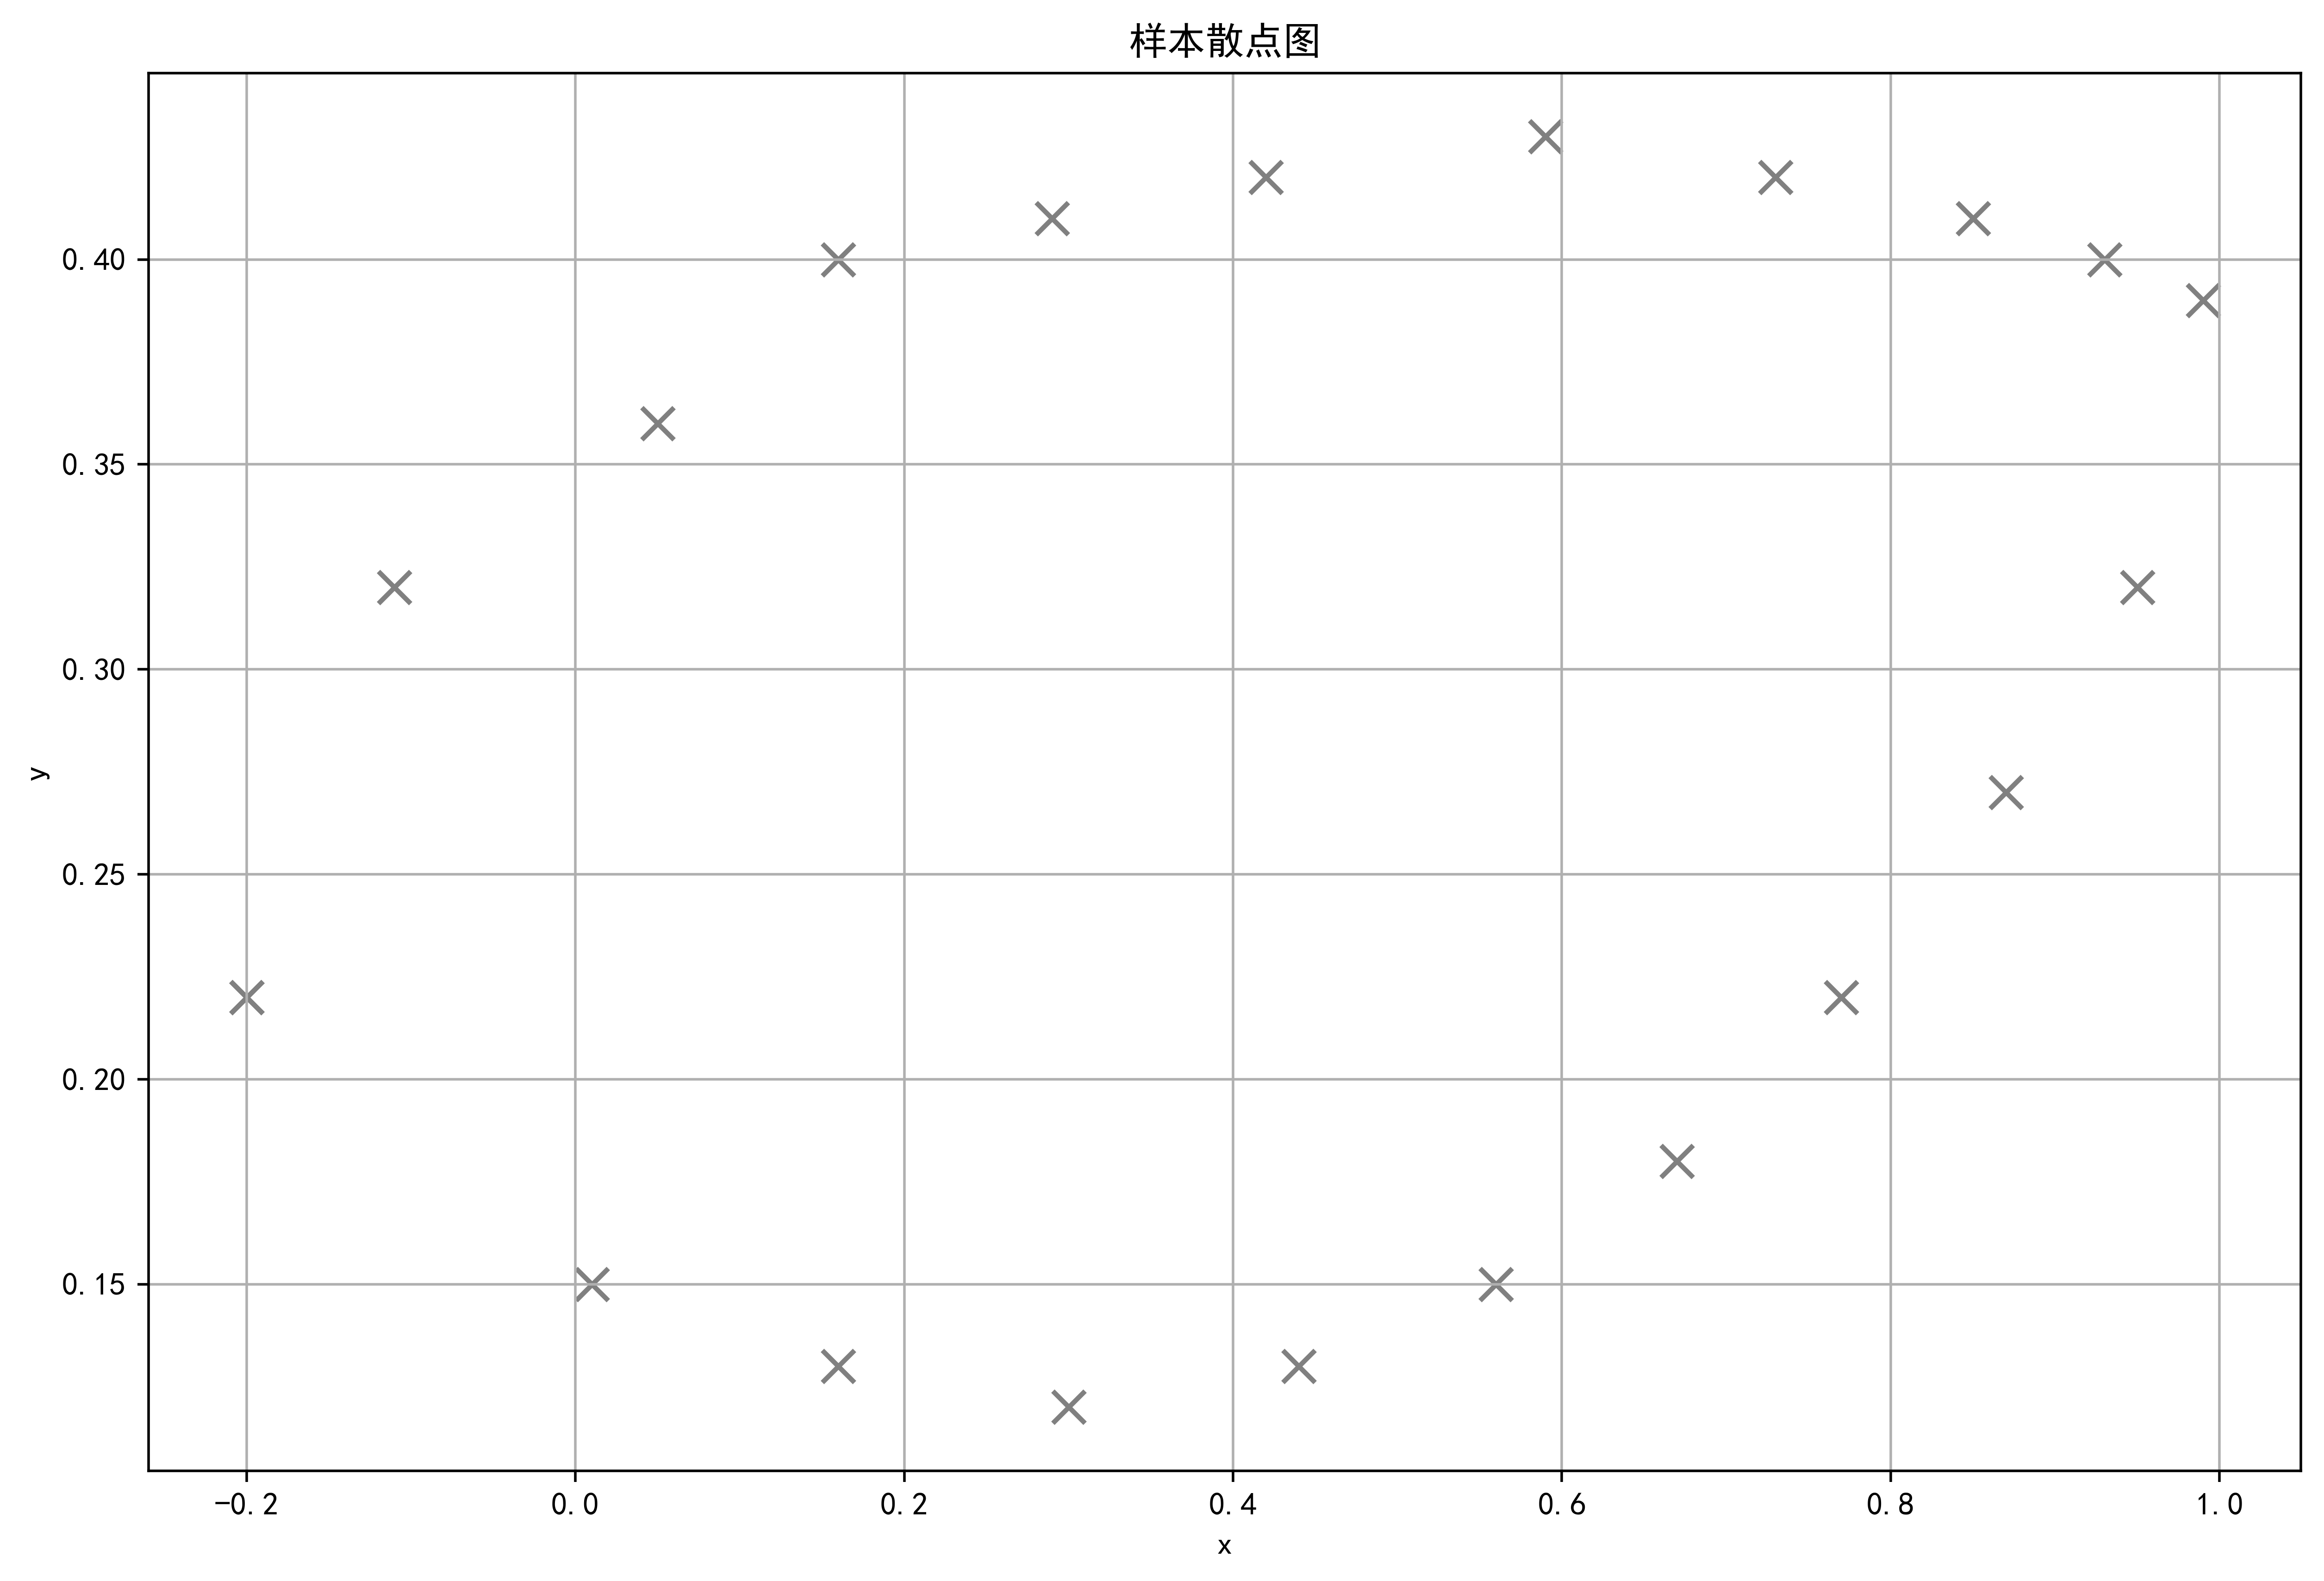

In [4]:
fig = plt.figure(figsize=(12,8), dpi=500)
plt.scatter(x, y, c='gray', marker='x', s=100)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('样本散点图')
plt.savefig('scatter2.png')
plt.show()
plt.close()

In [5]:
N = len(x)

csx = spi.CubicSpline(np.arange(N), x, bc_type='periodic')
csy = spi.CubicSpline(np.arange(N), y, bc_type='periodic')

# cs = spi.CubicSpline(x, y, bc_type='periodic')
# print(cs)
# cs1 = spi.CubicSpline(x1, y1)
# print(cs1.c)
# cs2 = spi.CubicSpline(x2, y2)
# print(cs2.c)

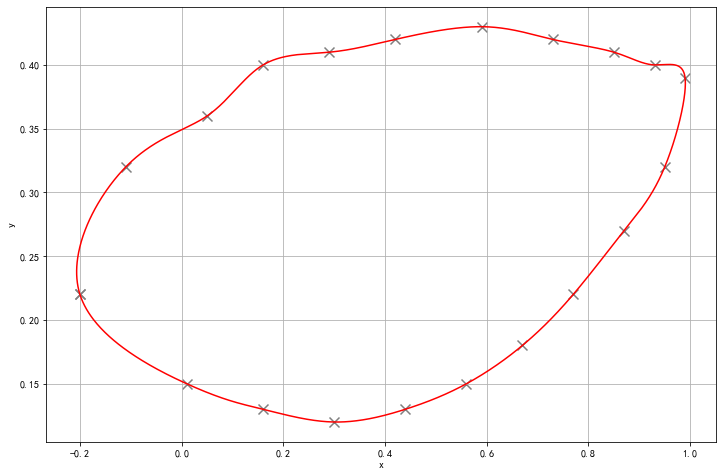

In [6]:
xs = np.arange(0, N-1, 0.01)

fig = plt.figure(figsize=(12,8))
plt.scatter(x, y, c='gray', marker='x', s=100)
plt.plot(csx(xs), csy(xs), c='red')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
# plt.savefig('scipycube.png')
plt.show()
plt.close()

In [7]:
x_arr = np.array(x[:-1])
y_arr = np.array(y[:-1])
datax = {'x':x_arr, 'y':y_arr, 'xy':x_arr * y_arr, 'y^2':y_arr * y_arr} 
datay = {'x^2':x_arr * x_arr}
x_train = pd.DataFrame(datax)
y_train = pd.DataFrame(datay)
print(x_train)
print(y_train)

       x     y      xy     y^2
0  -0.20  0.22 -0.0440  0.0484
1   0.01  0.15  0.0015  0.0225
2   0.16  0.13  0.0208  0.0169
3   0.30  0.12  0.0360  0.0144
4   0.44  0.13  0.0572  0.0169
5   0.56  0.15  0.0840  0.0225
6   0.67  0.18  0.1206  0.0324
7   0.77  0.22  0.1694  0.0484
8   0.87  0.27  0.2349  0.0729
9   0.95  0.32  0.3040  0.1024
10  0.99  0.39  0.3861  0.1521
11  0.93  0.40  0.3720  0.1600
12  0.85  0.41  0.3485  0.1681
13  0.73  0.42  0.3066  0.1764
14  0.59  0.43  0.2537  0.1849
15  0.42  0.42  0.1764  0.1764
16  0.29  0.41  0.1189  0.1681
17  0.16  0.40  0.0640  0.1600
18  0.05  0.36  0.0180  0.1296
19 -0.11  0.32 -0.0352  0.1024
       x^2
0   0.0400
1   0.0001
2   0.0256
3   0.0900
4   0.1936
5   0.3136
6   0.4489
7   0.5929
8   0.7569
9   0.9025
10  0.9801
11  0.8649
12  0.7225
13  0.5329
14  0.3481
15  0.1764
16  0.0841
17  0.0256
18  0.0025
19  0.0121


In [8]:
model = LR()
reg = model.fit(x_train,y_train)
theta = model.coef_
beta = model.intercept_
print(list(theta))
print(beta)

[array([  0.0373729 ,   6.4038203 ,   2.64407568, -13.30220688])]
[-0.61675406]


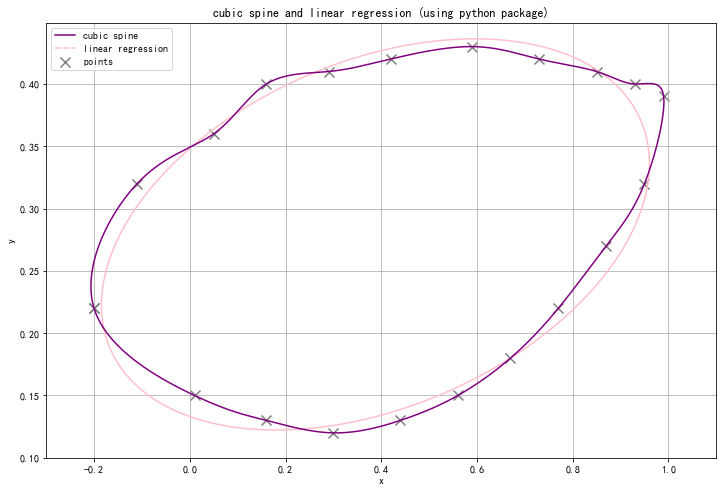

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(csx(xs), csy(xs), c='purple', label='cubic spine')
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')

xx = np.arange(-0.3, 1.1, 0.001)
yy = np.arange(0.1, 0.45, 0.001)
xx, yy = np.meshgrid(xx, yy)
zz = beta + theta[0, 0] * xx + theta[0, 1] * yy + theta[0, 2] * np.multiply(xx, yy) + theta[0, 3] * np.multiply(yy, yy) - np.multiply(xx, xx) 

CS = ax.contour(xx, yy, zz, 0, colors='pink')
CS.collections[0].set_label('linear regression')

ax.scatter(x, y, c='gray', marker='x', s=100, label='points')

ax.legend()
plt.legend()
plt.title('cubic spine and linear regression (using python package)')

plt.savefig('scipy.png')
plt.show()
plt.close()

In [10]:
def f(x):
    return 0.25 * (1 - x) ** 3 - 3.43 / 6 * x ** 3 + (1 + 3.43 / 6) * x - 0.25 * (1 - x)

In [11]:
f(1/3)

0.41012345679012346

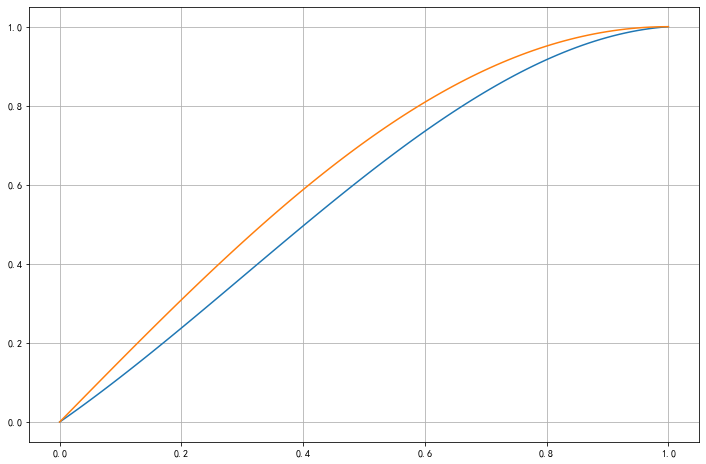

In [12]:
import math
fig = plt.figure(figsize=(12,8))
t = np.linspace(0, 1, 100)
plt.plot(t, f(t))
plt.plot(t, np.sin(math.pi / 2 * t))
plt.grid()
plt.show()

In [13]:
Mx = [0.50709311714530891, -0.22746861616752340, 4.2781310867928156E-002, -3.6565142043757702E-003, -2.8155432864359401E-002, -3.7216398972686393E-003, -1.6957950326107054E-002, 1.1553140794287205E-002, -2.9254255223173112E-002, -1.4536363088545445E-002, -0.15260006354080916, 2.4936474200634589E-002, -6.7145718820811259E-002, 3.6462723365777105E-003, -6.7439613712450261E-002, 8.6112532988534593E-002, -3.7010568309589723E-002, 6.1929740249824290E-002, -9.0708395371916439E-002, 9.0381441575125630E-004, 0.50709311714530891]
My = [4.9409026797001335E-004, 7.8011944728198723E-002, -1.2541976469125507E-002, 3.2156038038295066E-002, 3.9177992819944257E-003, 1.2172841723718993E-002, 7.3907766026706191E-003, 1.8263994645139545E-002, -2.0446633589753450E-002, 6.3522360899939928E-002, -0.11364274563698991, 3.1048786156839283E-002, -1.0552577804301562E-002, 1.1161525060366965E-002, -3.4093343623231971E-002, 5.2116062456102332E-003, 1.3247097454725363E-002, -5.8199996064511685E-002, 3.9552879650763990E-002, -0.10001170135247860, 4.9409026797001335E-004]

In [14]:
print(Mx)
print(len(Mx))
print(My)
print(len(My))

[0.5070931171453089, -0.2274686161675234, 0.042781310867928156, -0.0036565142043757702, -0.0281554328643594, -0.0037216398972686393, -0.016957950326107054, 0.011553140794287205, -0.029254255223173112, -0.014536363088545445, -0.15260006354080916, 0.02493647420063459, -0.06714571882081126, 0.0036462723365777105, -0.06743961371245026, 0.08611253298853459, -0.03701056830958972, 0.06192974024982429, -0.09070839537191644, 0.0009038144157512563, 0.5070931171453089]
21
[0.0004940902679700133, 0.07801194472819872, -0.012541976469125507, 0.032156038038295066, 0.003917799281994426, 0.012172841723718993, 0.007390776602670619, 0.018263994645139545, -0.02044663358975345, 0.06352236089993993, -0.11364274563698991, 0.031048786156839283, -0.010552577804301562, 0.011161525060366965, -0.03409334362323197, 0.005211606245610233, 0.013247097454725363, -0.058199996064511685, 0.03955287965076399, -0.1000117013524786, 0.0004940902679700133]
21


In [15]:
intervals = []
n = 20

# print(u)

# for i in range(1, n + 1):
#     intervals.append([1 if (j >= i and j < i + 1) else 0 for j in u])

# for interval in intervals:
#     print(interval)
    
# i = 1
# xu = (Mx[i - 1] / 6 * (i + 1 - u) ** 3 + Mx[i] / 6 * (u - i) ** 3 + (x[i] - Mx[i] / 6) * (u - i) + (x[i - 1] - Mx[i - 1] / 6) * (i + 1 - u))
# yu = (My[i - 1] / 6 * (i + 1 - u) ** 3 + My[i] / 6 * (u - i) ** 3 + (y[i] - My[i] / 6) * (u - i) + (y[i - 1] - My[i - 1] / 6) * (i + 1 - u))
    
# xu, yu = 0, 0

# for i in range(1, n):
#     xu += (Mx[i - 1] / 6 * (i + 1 - u) ** 3 + Mx[i] / 6 * (u - i) ** 3 + (x[i] - Mx[i] / 6) * (u - i) + (x[i - 1] - Mx[i - 1] / 6) * (i + 1 - u)) * intervals[i]
#     yu += (My[i - 1] / 6 * (i + 1 - u) ** 3 + My[i] / 6 * (u - i) ** 3 + (y[i] - My[i] / 6) * (u - i) + (y[i - 1] - My[i - 1] / 6) * (i + 1 - u)) * intervals[i]

# print(len(xu))
# print(len(u))

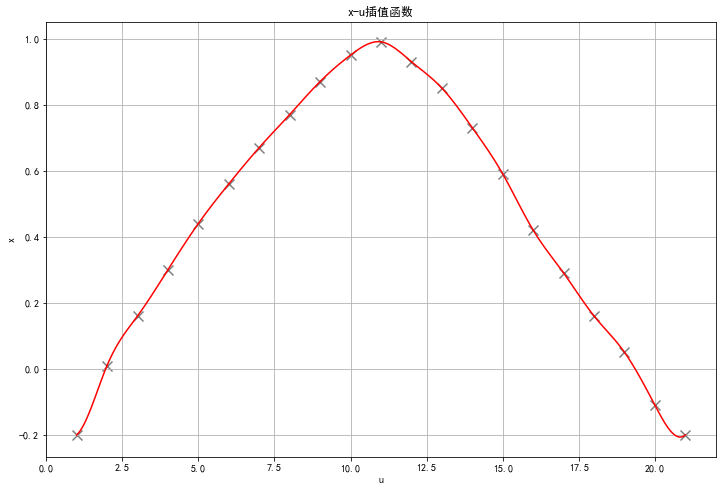

In [16]:
fig = plt.figure(figsize=(12,8))
plt.scatter(range(1, 22), x, c='gray', marker='x', s=100)
for i in range(1, n + 1):
    u = np.linspace(i, i + 1, 100)
    xu = (Mx[i - 1] / 6 * (i + 1 - u) ** 3 + Mx[i] / 6 * (u - i) ** 3 + (x[i] - Mx[i] / 6) * (u - i) + (x[i - 1] - Mx[i - 1] / 6) * (i + 1 - u))
    plt.plot(u, xu, color='red')
plt.grid()
plt.xlabel('u')
plt.ylabel('x')
plt.title('x-u插值函数')
plt.savefig('xu.png')
plt.show()
plt.close()


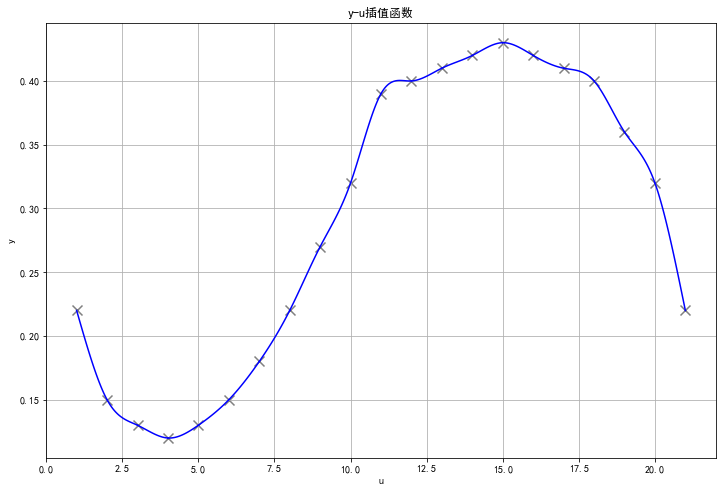

In [17]:
fig = plt.figure(figsize=(12,8))
plt.scatter(range(1, 22), y, c='gray', marker='x', s=100)
for i in range(1, n + 1):
    u = np.linspace(i, i + 1, 100)
    yu = (My[i - 1] / 6 * (i + 1 - u) ** 3 + My[i] / 6 * (u - i) ** 3 + (y[i] - My[i] / 6) * (u - i) + (y[i - 1] - My[i - 1] / 6) * (i + 1 - u))
    plt.plot(u, yu, color='blue')
plt.grid()
plt.xlabel('u')
plt.ylabel('y')
plt.title('y-u插值函数')
plt.savefig('yu.png')
plt.show()
plt.close()

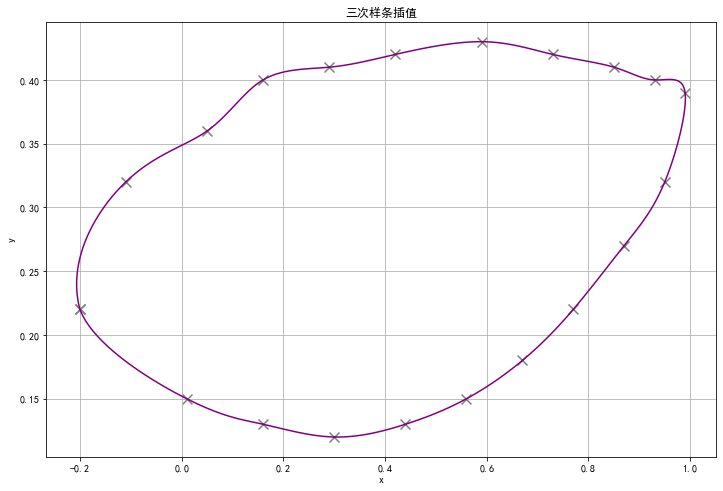

In [18]:
fig = plt.figure(figsize=(12,8))
plt.scatter(x, y, c='gray', marker='x', s=100)
for i in range(1, n + 1):
    u = np.linspace(i, i + 1, 100)
    xu = (Mx[i - 1] / 6 * (i + 1 - u) ** 3 + Mx[i] / 6 * (u - i) ** 3 + (x[i] - Mx[i] / 6) * (u - i) + (x[i - 1] - Mx[i - 1] / 6) * (i + 1 - u))
    yu = (My[i - 1] / 6 * (i + 1 - u) ** 3 + My[i] / 6 * (u - i) ** 3 + (y[i] - My[i] / 6) * (u - i) + (y[i - 1] - My[i - 1] / 6) * (i + 1 - u))
    plt.plot(xu, yu, color='purple')

# plt.plot(csx(xs), csy(xs), c='red', label='cubic spine')
    
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('三次样条插值')
plt.savefig('cs.png')
plt.show()
plt.close()

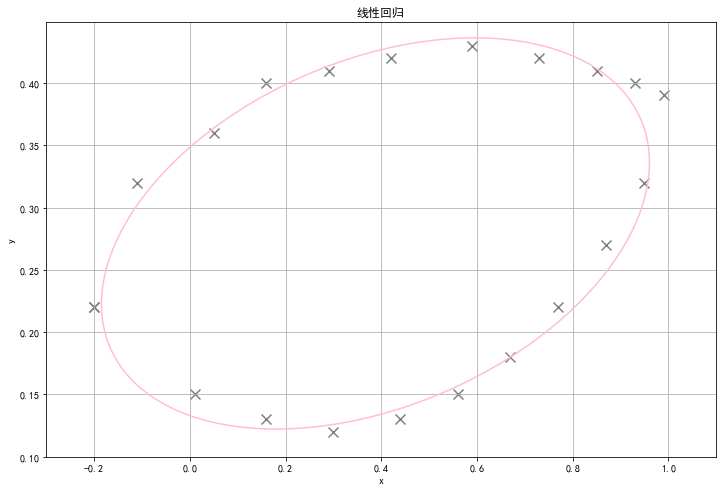

In [19]:
theta2 = [-0.61675402721062844, 3.7372895747393553E-002, 6.4038200357358814, 2.6440756536123722, -13.302206388291150]

fig, ax = plt.subplots(figsize=(12, 8))

# ax.plot(csx(xs), csy(xs), c='purple', label='cubic spine')
# ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')

xx = np.arange(-0.3, 1.1, 0.001)
yy = np.arange(0.1, 0.45, 0.001)
xx, yy = np.meshgrid(xx, yy)
zz = theta2[0] + theta2[1] * xx + theta2[2] * yy + theta2[3] * np.multiply(xx, yy) + theta2[4] * np.multiply(yy, yy) - np.multiply(xx, xx) 

CS = ax.contour(xx, yy, zz, 0, colors='pink')
# CS.collections[0].set_label('linear regression')

ax.scatter(x, y, c='gray', marker='x', s=100)

ax.grid()
# ax.legend()
# plt.legend()
plt.title('线性回归')

plt.savefig('lr.png')
plt.show()
plt.close()

In [20]:
U = sy.symbols('u')
xu, yu= [], []
xu_coeffs, yu_coeffs = [], []
for i in range(1, n + 1):
    phi = simplify(Mx[i - 1] / 6 * (i + 1 - U) ** 3 + Mx[i] / 6 * (U - i) ** 3 + (x[i] - Mx[i] / 6) * (U - i) + (x[i - 1] - Mx[i - 1] / 6) * (i + 1 - U))
    print(f'\Phi_{{{i}}}(u) &=', sy.latex(phi), '\\\\')
    
for i in range(1, n + 1):
    psi = simplify(My[i - 1] / 6 * (i + 1 - U) ** 3 + My[i] / 6 * (U - i) ** 3 + (y[i] - My[i] / 6) * (U - i) + (y[i - 1] - My[i - 1] / 6) * (i + 1 - U))
    print(f'\Psi_{{{i}}}(u) &=', sy.latex(psi), '\\\\')
#     phi = sy.Poly(phi)
#     psi = sy.Poly(psi)
#     xu.append(np.poly1d(phi.coeffs()))
#     yu.append(np.poly1d(psi.coeffs()))
#     xu_coeffs.append(phi.coeffs())
#     yu_coeffs.append(psi.coeffs())

NameError: name 'simplify' is not defined

In [ ]:
theta = np.array([-0.61675402721062844, 3.7372895747393553E-002, 6.4038200357358814, 2.6440756536123722, -13.302206388291150])

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

for i in range(n):
    u = np.linspace(i + 1, i + 2, 100)
    if i == n:
        plt.plot(xu[i](u), yu[i](u), color='purple', label='三次样条插值')
    else:
        plt.plot(xu[i](u), yu[i](u), color='purple')

ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')

xx = np.linspace(-0.3, 1.1, 100)
yy = np.linspace(0.1, 0.45, 100)
xx, yy = np.meshgrid(xx, yy)
zz = theta[0] + theta[1] * xx + theta[2] * yy + theta[3] * np.multiply(xx, yy) + theta[4] * np.multiply(yy, yy) - np.multiply(xx, xx) 

CS = ax.contour(xx, yy, zz, 0, colors='pink')
CS.collections[0].set_label('线性回归')

ax.scatter(x, y, c='gray', marker='x', s=100, label='散点')

plt.legend(loc='upper left')
plt.title('三次样条插值和线性回归')

plt.savefig('cslr.png')
plt.show()
plt.close()